<a href="https://colab.research.google.com/github/PosgradoMNA/Atividades-de-aprendizaje-SamaraGarcia/blob/Actividad4_Equipo15/Equipo15_Actividad_Semanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Semanal -- 4**

---



*   Ciencia y analítica de datos
*   Profesor: Jobish Vallikavungal Devasia
*   Fecha de entrega: 11 de Octubre del 2022
*   Alumnos:              
    1.   David Winterman A00919441
    2.   Samara García González A01273001











**Parte 1**

---





*   **Paso 1:**Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales. 
*   **Paso 2:**Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

* **Paso 3:** Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [257]:

#Importando las librerias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [258]:
#Se guarda la url del dataset en la variable inPath
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv '

In [259]:
#Leyendo las bases de datos y eliminado la primer columna porque ese es el index
df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**Significado de las columnas**
* X1: Amount of the given credit 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment.
* X12-X17: Amount of bill statement X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment  X18 
= amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


**Paso 0: Normalización min-max**

---



In [260]:
#Regresando las primeras 5 filas del Dataset
df.iloc[:, :23].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [261]:
#Haciendo una copia del dataframe para poder comparar antes y después
ndf = df.copy()
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [262]:
#Obteniendo el nombre de las columnas 
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [263]:
#Estandarizando el data set.
#Center to the mean and component wise scale to unit variance.

pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, :23].dropna(axis=0))) 
         
            

PCA()

**Paso 1:Transformación de datos**

---



In [264]:
#PCA es un método de reducción de datos ,pensado para usarse con grandes cantidades de variables, sobre todo de variables numéricas.
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,2.558097,2.024329,1.245378,1.213137,1.012814,0.978308,0.952829,0.942210,0.933452,0.884896,...,0.724304,0.635360,0.509705,0.499194,0.434545,0.363197,0.264859,0.201963,0.159027,0.152389
Proportion of variance,0.284506,0.178164,0.067431,0.063985,0.044598,0.041611,0.039472,0.038597,0.037883,0.034044,...,0.022809,0.017551,0.011295,0.010834,0.008210,0.005735,0.003050,0.001773,0.001100,0.001010
Cumulative proportion,0.284506,0.462670,0.530101,0.594086,0.638684,0.680295,0.719767,0.758364,0.796247,0.830291,...,0.939443,0.956993,0.968289,0.979123,0.987332,0.993068,0.996117,0.997891,0.998990,1.000000


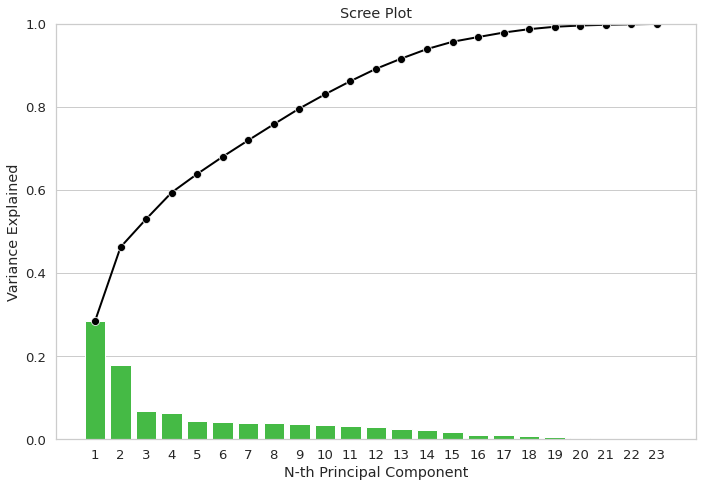

In [265]:
#Realizando la gráfica que nos muestra los componentes y la varianza que representan.
import matplotlib as mpl
import matplotlib.pyplot as plt
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))
#Caracteristicas de las barras
_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'limegreen'
                )
#Caracteristicas de las lineas
_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )
#Añadiendo título a la gráfica y a los ejes
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


**Paso 2:Interpretar componentes**

---

In [266]:
#Los primeros 12 componentes representan el 92% de la varianza total
((pcsSummary_df.iloc[2][12])*100).round(0)
#type(pcsSummary_df)

92.0

In [267]:
#Los primeros 7 componentes representan el 80% de la varianza total
((pcsSummary_df.iloc[2][7])*100).round(0)
#type(pcsSummary_df)

76.0

In [268]:
#Los primeros 2 componentes representan casi el 46% de la varianza total
((pcsSummary_df.iloc[2][1])*100).round(2)

46.27

In [269]:
#El primer componente solo representa el 28% la varianza total
((pcsSummary_df.iloc[1][0])*100).round(2)

28.45

In [270]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,...,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


In [271]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, :23].columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X1,0.068513,0.316364,0.017300,0.069526,-0.150030,-0.375095,0.106564,-0.059519,0.021914,0.017330,0.008608,-0.097753
X2,-0.021586,0.030205,0.024284,-0.078109,0.883357,-0.396295,0.065237,-0.027989,0.019138,0.023981,-0.009356,0.057416
X3,0.019167,-0.091513,-0.316638,0.246490,0.365704,0.563608,-0.400609,0.080516,-0.156240,0.062782,0.001826,-0.185169
X4,-0.005612,-0.043043,0.453725,-0.443931,-0.053225,0.280022,-0.160569,0.026316,-0.056505,0.038759,-0.010357,-0.142041
X5,0.014262,0.066656,-0.463023,0.462041,-0.164345,-0.088112,0.081440,-0.012669,0.047052,0.008012,-0.021446,-0.048505
X6,0.161183,-0.298260,-0.017384,0.016395,-0.035463,-0.039066,-0.086692,0.021131,-0.030753,0.003439,0.044480,0.623610
X7,0.194171,-0.334879,0.017808,0.050119,-0.037997,-0.060660,-0.091881,0.015266,-0.033568,0.006629,0.028042,0.376411
X8,0.200348,-0.343802,0.061514,0.084101,-0.023945,-0.069601,-0.020974,-0.026630,-0.011472,-0.024926,-0.106814,0.100277
X9,0.207166,-0.344508,0.088704,0.109227,-0.007883,-0.087272,0.039403,-0.056142,0.044599,-0.057006,-0.007062,-0.211043
X10,0.211029,-0.331488,0.108582,0.115438,0.001892,-0.087219,0.104041,-0.033713,0.054854,0.066757,0.010431,-0.358645


In [272]:
pcsComponents_df.PC1.idxmax()

'X15'

In [276]:
pcsComponents_df.PC1.idxmin()

'X2'

In [282]:
pcsComponents_df.PC2.idxmax()

'X1'

In [278]:
pcsComponents_df.PC2.idxmin()

'X9'

In [279]:
pcsComponents_df.PC3.idxmax()

'X4'

In [281]:
pcsComponents_df.PC3.idxmin()

'X5'

El componente com máxima varianza es X15 Amount of bill statement 

In [273]:
pcsComponents_df.PC1.nlargest(3)

X15    0.353848
X16    0.351716
X14    0.349744
Name: PC1, dtype: float64

In [274]:
pcsComponents_df.PC2.idxmin()

'X9'

El componente com minima varianza es X9 que corresponde al historial de pago

**Paso 3: Gráfica de valores atípicos BoxPlot**

---

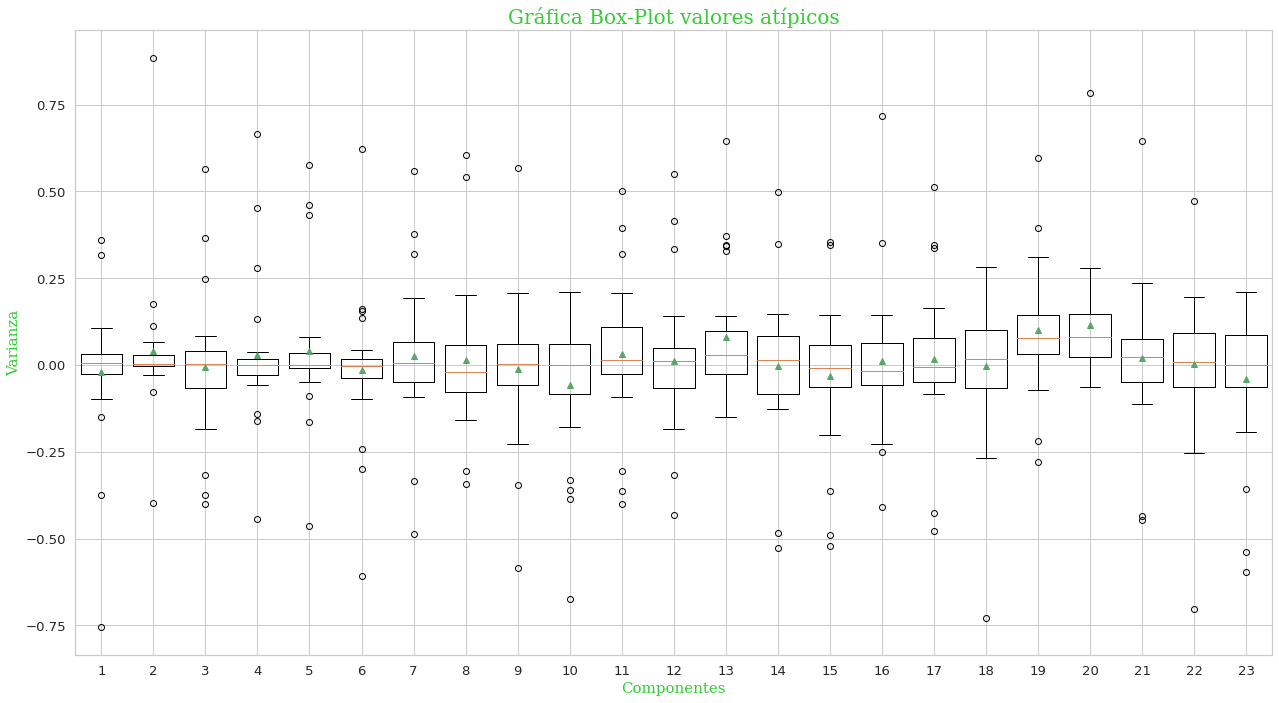

In [275]:
# Box Plot
plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(pcsComponents_df, showmeans=True, widths=(0.8))

#Colocando fuentes y colores para los títulos
font1 = {'family':'serif','color':'limegreen','size':20}
font2 = {'family':'serif','color':'limegreen','size':15}

#Agregando titulo
plt.title("Gráfica Box-Plot valores atípicos",fontdict = font1)
#Agregando nombres a los ejes
plt.xlabel("Componentes",fontdict = font2)
plt.ylabel("Varianza",fontdict = font2)

plt.show()

**Parte 2**

---



**Responde las siguientes preguntas:**

1.  ¿Cuál es el número de componentes mínimo y por qué?

R= En este caso en particular podríamos decir que el número mínimo de componentes a considerar es de 12. En caso de tomar menos variables es muy probable que los resultados finales sean erróneos pues se pierde gran parte de la varianza.

2.  ¿Cuál es la variación de los datos que representan esos componentes?

R=Estos componentes representan el 92% de la variación total asociada con las 23 variables originales.

3.  ¿Cuál es la pérdida de información después de realizar PCA?

R= La perdida de información es del 8%

4.  De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

R= De los primeros 3 componentes, las variables que tienen mayor importancia son: X15,X1 Y X4, por su parte las que tienen menos importancia son: X2,X9 y X5 respectivamente.

5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

R= Se recomienda usar PCA cuando se tenga una cantidad grande de variables pero no todas las variables sean igual de significativas ni tengan gran aporte en el modelo de predicción, esto puede hacer que nuestro modelo se acerque peligrosamente al overfitting, además de acrecentar el tiempo de procesamiento para realizar las predicciones, es por esto que al realizar un proceso de PCA, los resultados del modelo mejoran optimizando también el tiempo y uso de recursos.

**Referencias**

AML.(2018, 8 octubre). Comprende Principal Component Analysis. Aprende Machine Learning. Recuperado 8 de octubre de 2022, de https://www.aprendemachinelearning.com/comprende-principal-component-analysis/